# Wind Speed Vs Wind Stress
# May 23, 2017

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from salishsea_tools import gsw_calls
import xarray as xr
import numpy.ma as ma
import cmocean 
import netCDF4 as nc
from salishsea_tools import (
    nc_tools,
    viz_tools,
)

In [2]:
bathy = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')

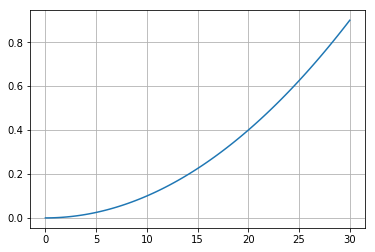

In [3]:
Q0 = 10**3
C =  10**(-3)
Qa = 1

windspeed = np.linspace(0,30,100)
windstress = windspeed**2 * Qa * C / Q0 * Q0 

plt.plot(windspeed,windstress)
plt.grid('on')

In [50]:
gsw_calls.generic_gsw_caller('gsw_rho.m',[np.array(30),np.array(10),np.array(0)])

array(1023.0)

# January with rr_vtau = 0.1, -0.1

In [53]:
WN010T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanN0.1/SalishSea_1h_20170101_20170102_grid_T.nc')
WN010V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanN0.1/SalishSea_1h_20170101_20170102_grid_V.nc')
WS010T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanS0.1/SalishSea_1h_20170101_20170102_grid_T.nc')
WS010V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanS0.1/SalishSea_1h_20170101_20170102_grid_V.nc')

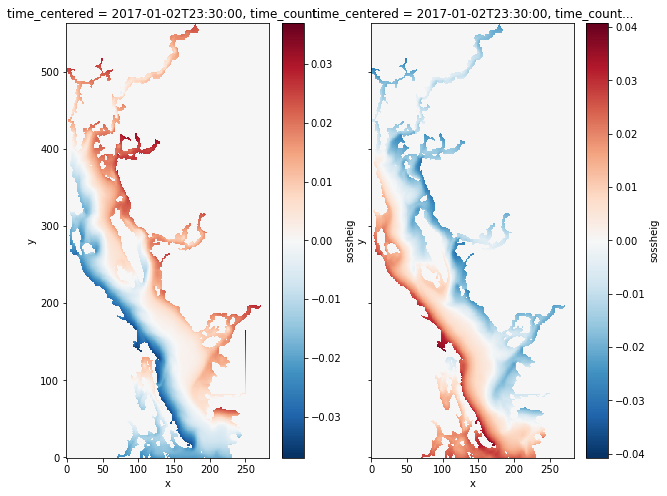

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
WN010T.sossheig.isel(time_counter = 47).plot(ax=ax1)
WS010T.sossheig.isel(time_counter = 47).plot(ax=ax2)

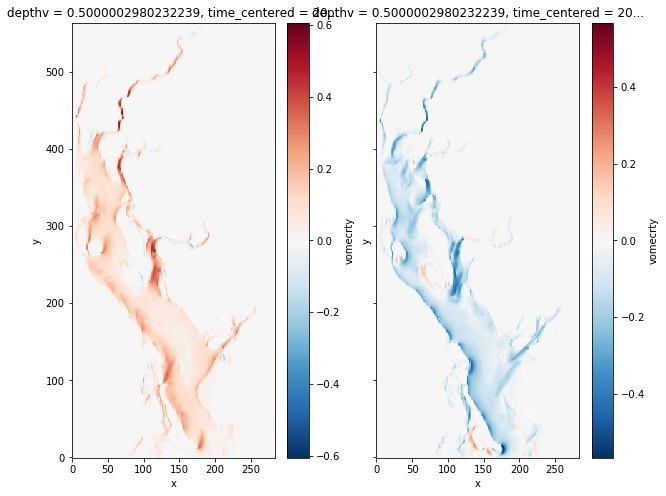

In [11]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
WN010V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax1)
WS010V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax2)

(75, 260)

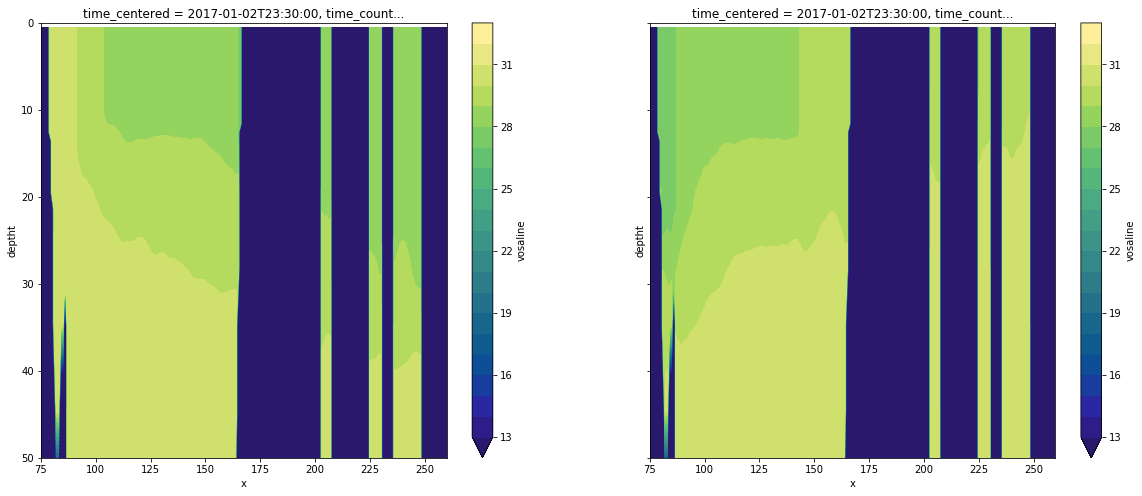

In [84]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
WN010T.vosaline.isel(y=180,time_counter=47).plot.contourf(ax=ax1, levels = np.arange(13,34,1),cmap = cmocean.cm.haline)
WS010T.vosaline.isel(y=180,time_counter=47).plot.contourf(ax=ax2, levels = np.arange(13,34,1),cmap = cmocean.cm.haline)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((75,260))
ax2.set_xlim((75,260))

(10, 85)

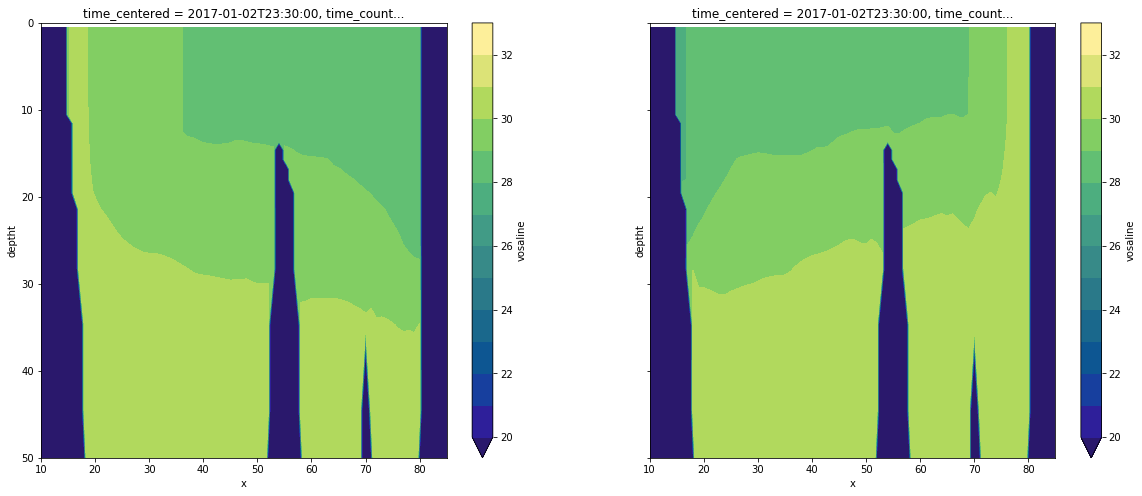

In [85]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
WN010T.vosaline.isel(y=350,time_counter=47).plot.contourf(ax=ax1,levels = np.arange(20,34,1),cmap = cmocean.cm.haline)
WS010T.vosaline.isel(y=350,time_counter=47).plot.contourf(ax=ax2,levels = np.arange(20,34,1), cmap = cmocean.cm.haline)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((10,85))
ax2.set_xlim((10,85))

(10, 85)

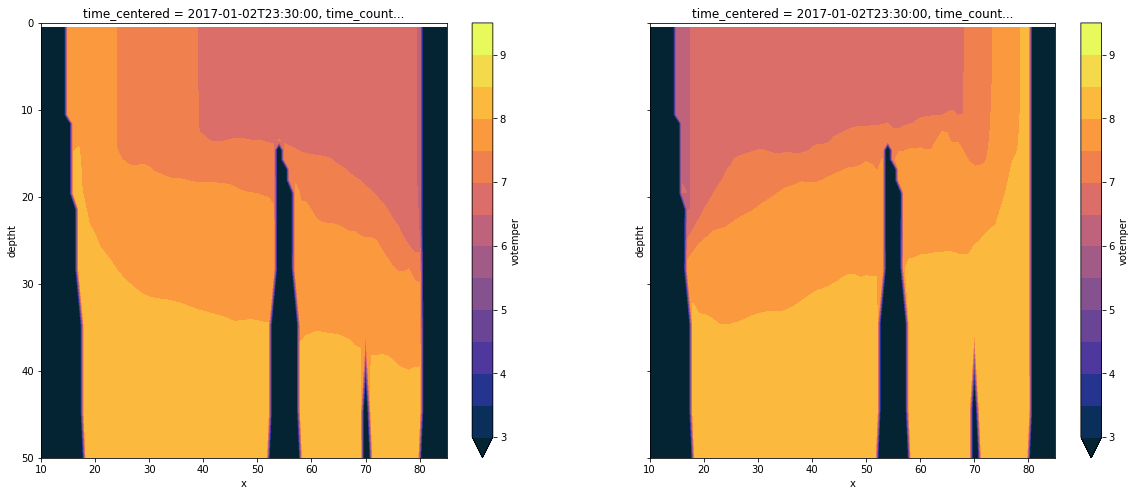

In [86]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
WN010T.votemper.isel(y=350,time_counter=47).plot.contourf(ax=ax1,levels = np.arange(3,10,0.5),cmap = cmocean.cm.thermal)
WS010T.votemper.isel(y=350,time_counter=47).plot.contourf(ax=ax2,levels = np.arange(3,10,0.5),cmap = cmocean.cm.thermal)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((10,85))
ax2.set_xlim((10,85))

(75, 260)

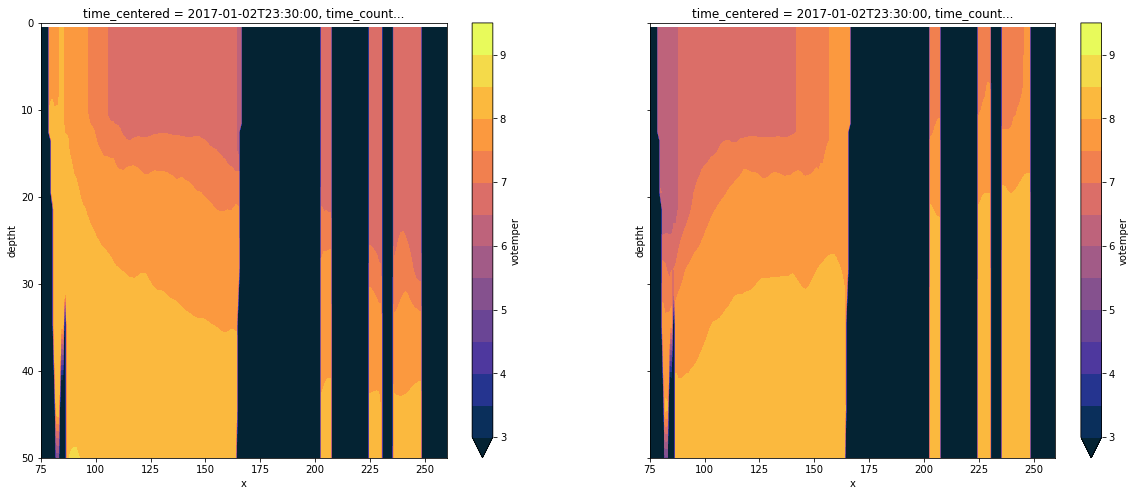

In [87]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
WN010T.votemper.isel(y=180,time_counter=47).plot.contourf(ax=ax1,levels = np.arange(3,10,0.5),cmap = cmocean.cm.thermal)
WS010T.votemper.isel(y=180,time_counter=47).plot.contourf(ax=ax2,levels = np.arange(3,10,0.5),cmap = cmocean.cm.thermal)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((75,260))
ax2.set_xlim((75,260))

In [4]:
WN010V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanN0.1/SalishSea_1h_20170101_20170102_grid_V.nc')
WS010V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.1/SalishSea_1h_20170101_20170102_grid_V.nc')

vgrid1 = WN010V2.variables['vomecrty']
zlevels1 = WN010V2.variables['depthv']
timesteps1 = WN010V2.variables['time_counter']

vgrid2 = WS010V2.variables['vomecrty']
zlevels2 = WS010V2.variables['depthv']
timesteps2 = WS010V2.variables['time_counter']

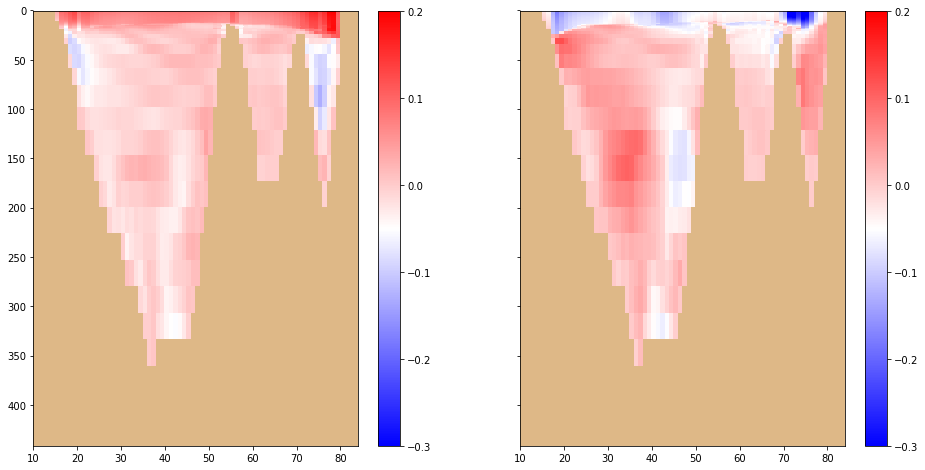

In [15]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 350
section_slice = np.arange(10, 85)
timestamp = nc_tools.timestamp(WN010V2, t)

vgrid_tzyx1 = np.ma.masked_values(vgrid1[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels1[:zmax], vgrid_tzyx1,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)

vgrid_tzyx2 = np.ma.masked_values(vgrid2[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels2[:zmax], vgrid_tzyx2,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2)

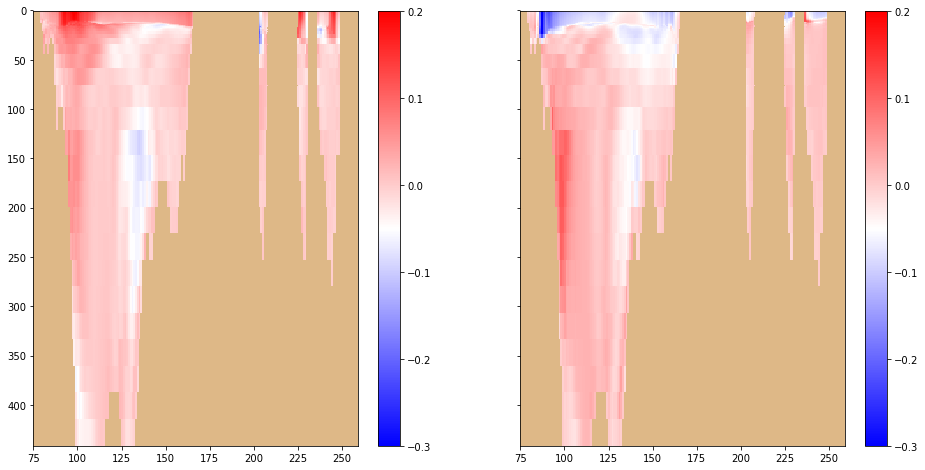

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 180
section_slice = np.arange(75, 260)
timestamp = nc_tools.timestamp(WN010V2, t)

vgrid_tzyx1 = np.ma.masked_values(vgrid1[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels1[:zmax], vgrid_tzyx1,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)

vgrid_tzyx2 = np.ma.masked_values(vgrid2[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels2[:zmax], vgrid_tzyx2,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2)

# June with rr_vtau = 0.1, -0.1

In [50]:
SN010T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunN0.1/SalishSea_1h_20160601_20160602_grid_T.nc')
SN010V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunN0.1/SalishSea_1h_20160601_20160602_grid_V.nc')
SS010T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunS0.1/SalishSea_1h_20160601_20160602_grid_T.nc')
SS010V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunS0.1/SalishSea_1h_20160601_20160602_grid_V.nc')

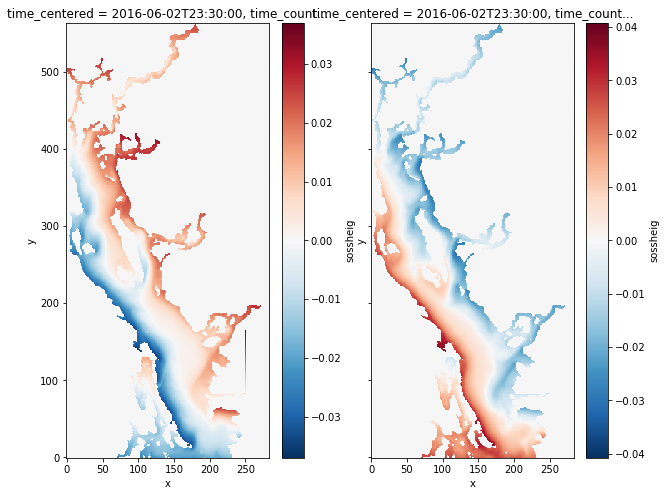

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
SN010T.sossheig.isel(time_counter = 47).plot(ax=ax1)
SS010T.sossheig.isel(time_counter = 47).plot(ax=ax2)

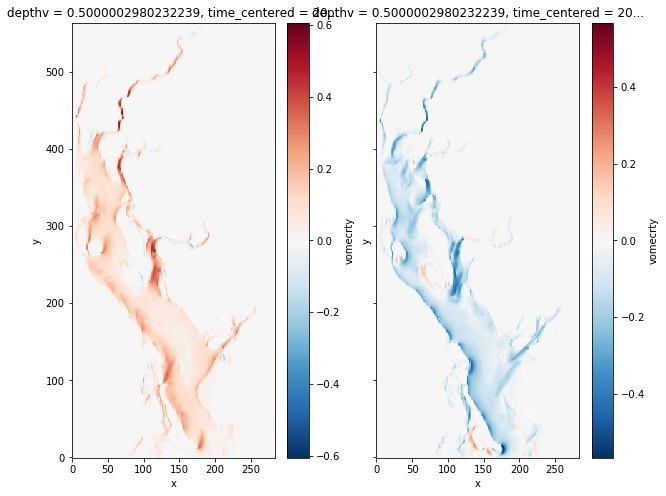

In [52]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
SN010V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax1)
SS010V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax2)

(75, 260)

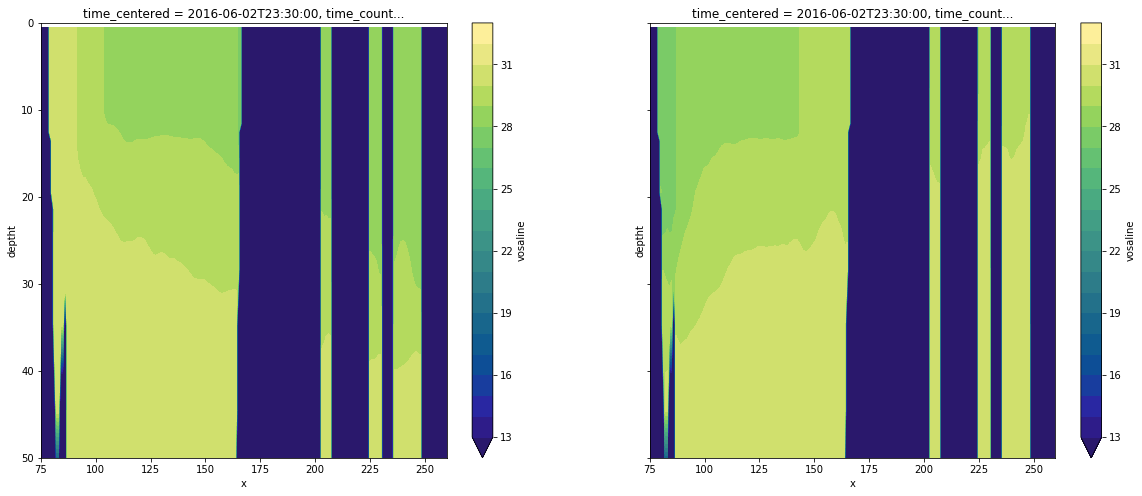

In [97]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
SN010T.vosaline.isel(y=180,time_counter=47).plot.contourf(ax=ax1, levels = np.arange(13,34,1),cmap = cmocean.cm.haline)
SS010T.vosaline.isel(y=180,time_counter=47).plot.contourf(ax=ax2, levels = np.arange(13,34,1),cmap = cmocean.cm.haline)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((75,260))
ax2.set_xlim((75,260))

(10, 85)

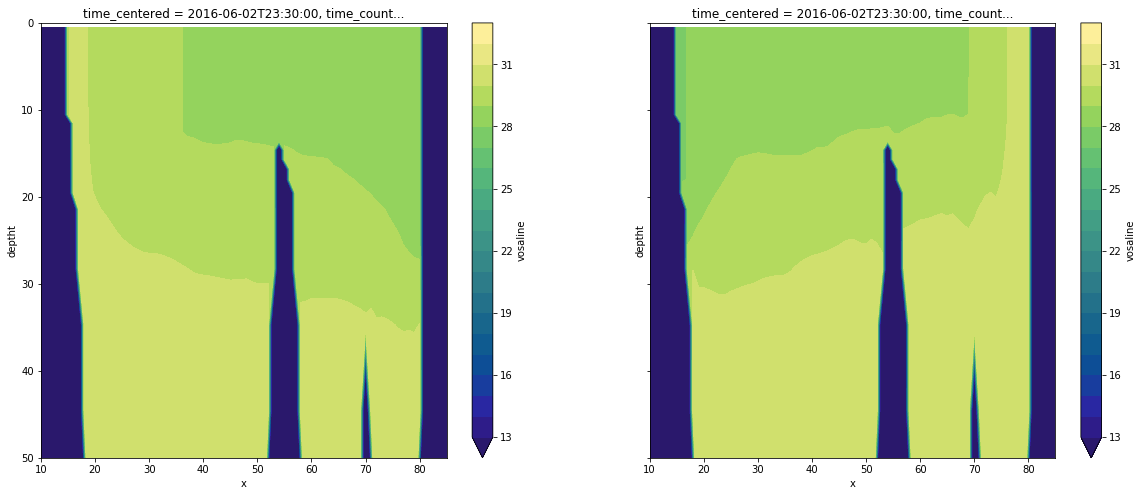

In [89]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
SN010T.vosaline.isel(y=350,time_counter=47).plot.contourf(ax=ax1, levels = np.arange(13,34,1),cmap = cmocean.cm.haline)
SS010T.vosaline.isel(y=350,time_counter=47).plot.contourf(ax=ax2, levels = np.arange(13,34,1),cmap = cmocean.cm.haline)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((10,85))
ax2.set_xlim((10,85))

(75, 260)

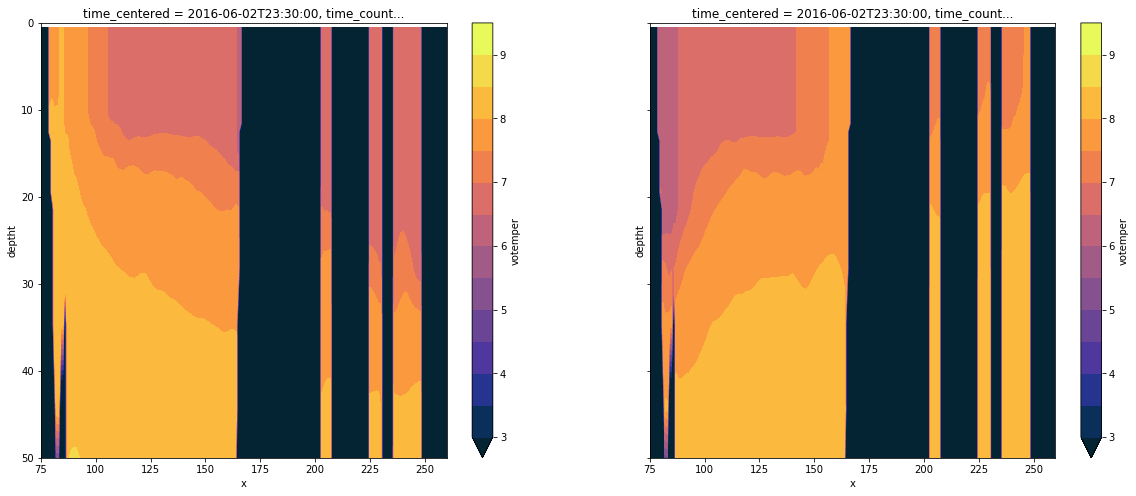

In [90]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
SN010T.votemper.isel(y=180,time_counter=47).plot.contourf(ax=ax1,levels = np.arange(3,10,0.5), cmap = cmocean.cm.thermal)
SS010T.votemper.isel(y=180,time_counter=47).plot.contourf(ax=ax2,levels = np.arange(3,10,0.5), cmap = cmocean.cm.thermal)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((75,260))
ax2.set_xlim((75,260))

(10, 85)

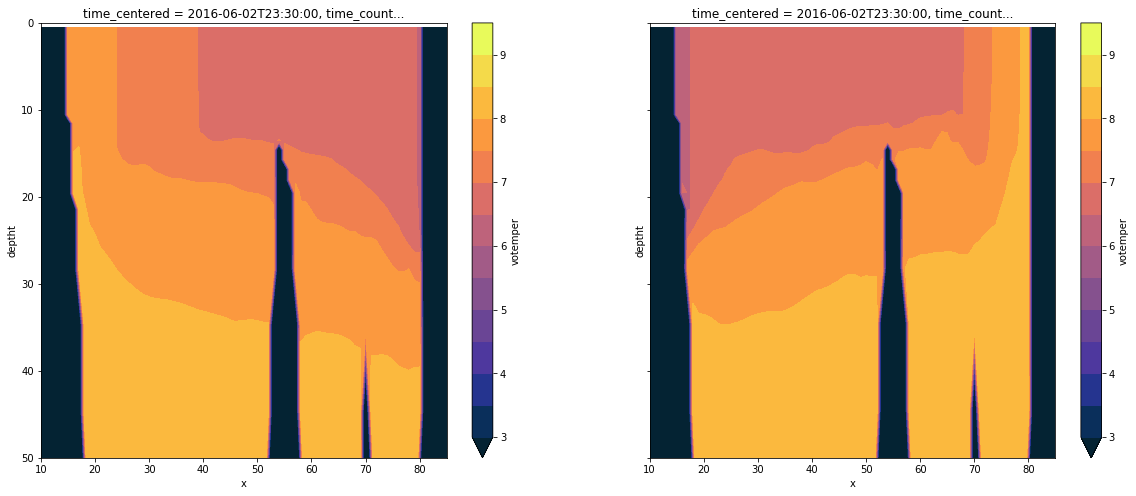

In [88]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
SN010T.votemper.isel(y=350,time_counter=47).plot.contourf(ax=ax1,levels = np.arange(3,10,0.5), cmap = cmocean.cm.thermal)
SS010T.votemper.isel(y=350,time_counter=47).plot.contourf(ax=ax2,levels = np.arange(3,10,0.5), cmap = cmocean.cm.thermal)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((10,85))
ax2.set_xlim((10,85))

In [20]:
SN010V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.1/SalishSea_1h_20160601_20160602_grid_V.nc')
SS010V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.1/SalishSea_1h_20160601_20160602_grid_V.nc')

vgrida = SN010V2.variables['vomecrty']
zlevelsa = SN010V2.variables['depthv']
timestepsa = SN010V2.variables['time_counter']

vgridb = SS010V2.variables['vomecrty']
zlevelsb = SS010V2.variables['depthv']
timestepsb = SS010V2.variables['time_counter']

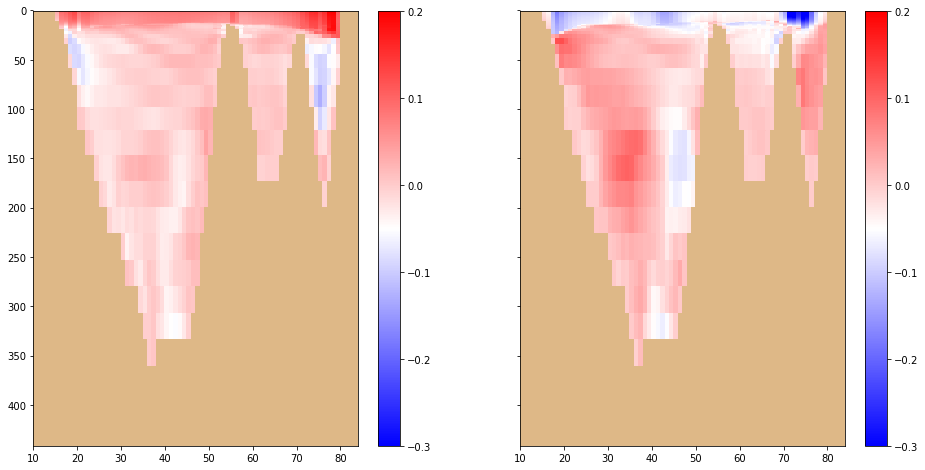

In [21]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 350
section_slice = np.arange(10, 85)
timestamp = nc_tools.timestamp(SN010V2, t)

vgrid_tzyxa = np.ma.masked_values(vgrida[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevelsa[:zmax], vgrid_tzyxa,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)

vgrid_tzyxb = np.ma.masked_values(vgridb[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevelsb[:zmax], vgrid_tzyxb,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2)

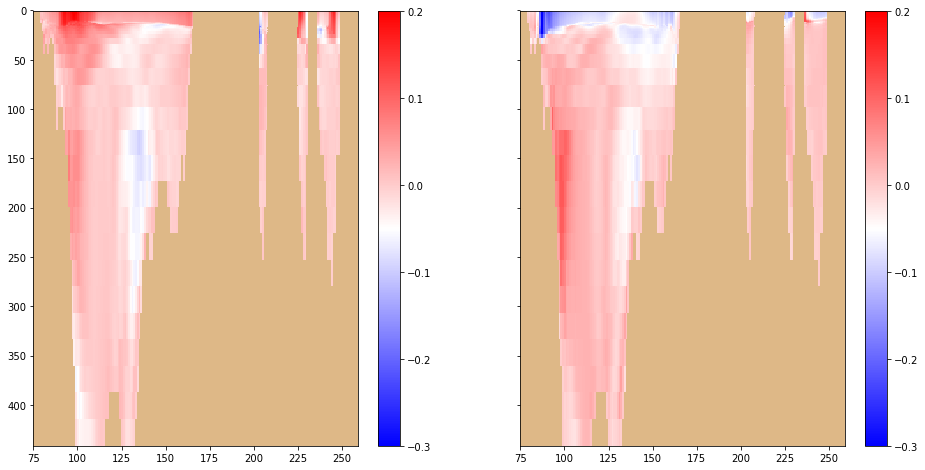

In [22]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 180
section_slice = np.arange(75, 260)
timestamp = nc_tools.timestamp(SN010V2, t)

vgrid_tzyxa = np.ma.masked_values(vgrida[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevelsa[:zmax], vgrid_tzyxa,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)

vgrid_tzyxb = np.ma.masked_values(vgridb[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevelsb[:zmax], vgrid_tzyxb,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2)

# Jan with rr_vtau = 0.05, -0.05

In [55]:
WN005T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanN0.05/SalishSea_1h_20170101_20170102_grid_T.nc')
WN005V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanN0.05/SalishSea_1h_20170101_20170102_grid_V.nc')
WS005T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanS0.05/SalishSea_1h_20170101_20170102_grid_T.nc')
WS005V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanS0.05/SalishSea_1h_20170101_20170102_grid_V.nc')

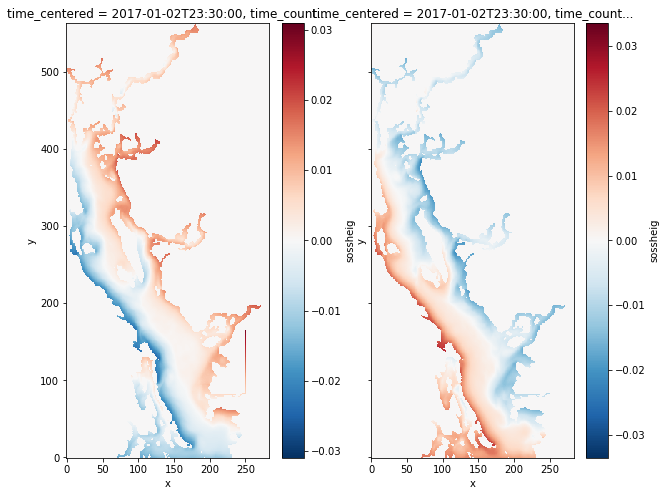

In [56]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
WN005T.sossheig.isel(time_counter = 47).plot(ax=ax1)
WS005T.sossheig.isel(time_counter = 47).plot(ax=ax2)

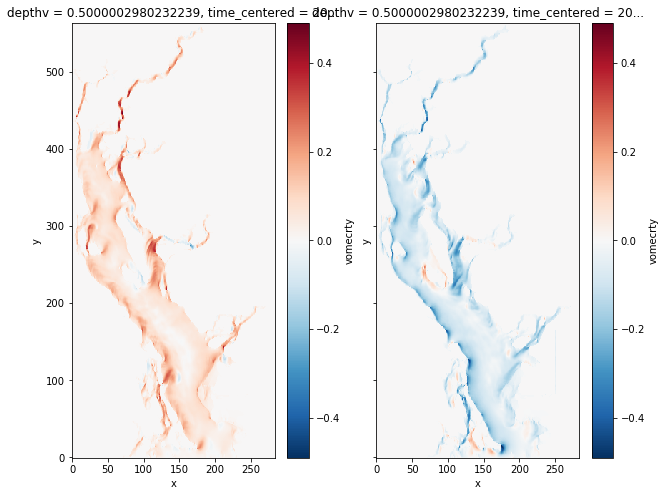

In [57]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
WN005V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax1)
WS005V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax2)

(10, 85)

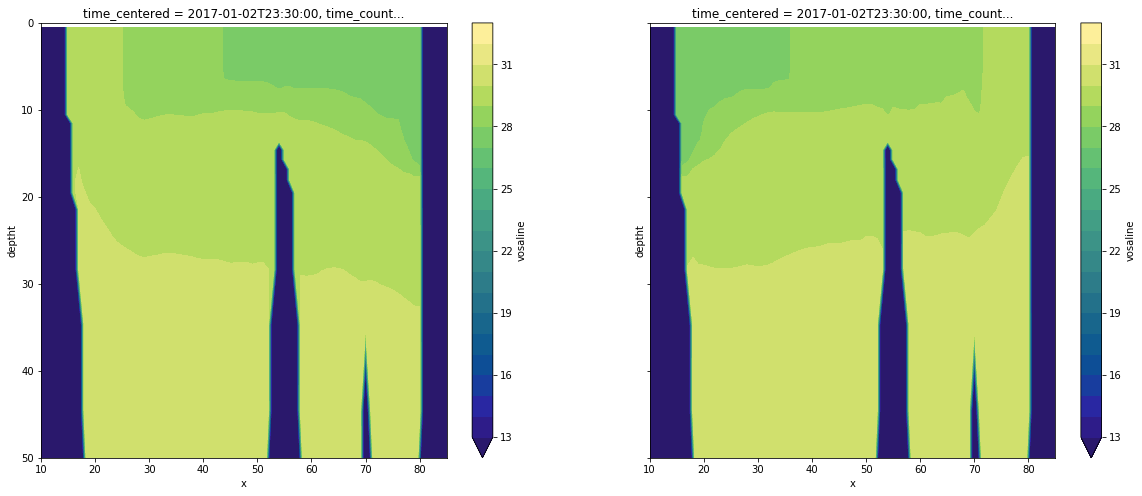

In [96]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
WN005T.vosaline.isel(y=350,time_counter=47).plot.contourf(ax=ax1, levels = np.arange(13,34,1),cmap = cmocean.cm.haline)
WS005T.vosaline.isel(y=350,time_counter=47).plot.contourf(ax=ax2, levels = np.arange(13,34,1),cmap = cmocean.cm.haline)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((10,85))
ax2.set_xlim((10,85))

(75, 260)

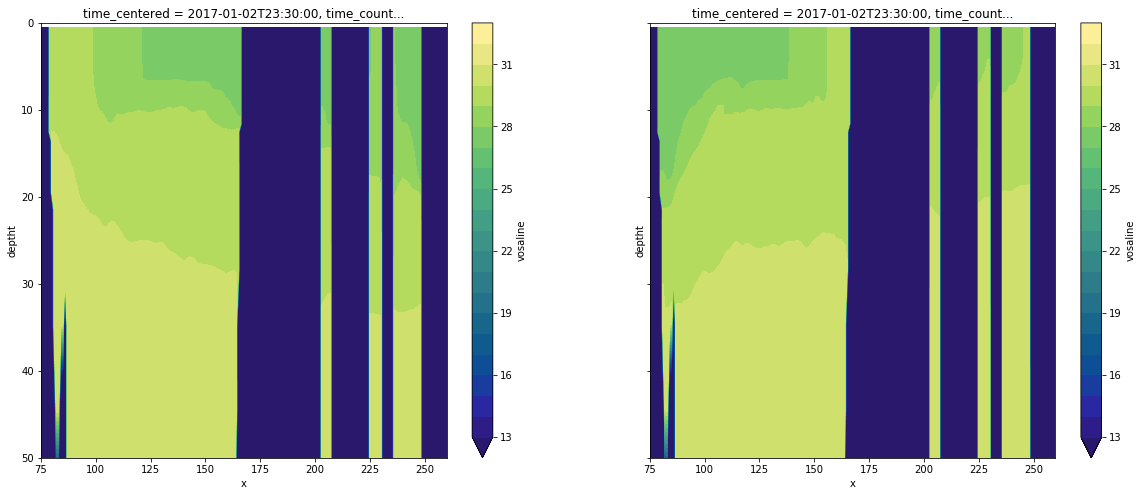

In [94]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
WN005T.vosaline.isel(y=180,time_counter=47).plot.contourf(ax=ax1, levels = np.arange(13,34,1),cmap = cmocean.cm.haline)
WS005T.vosaline.isel(y=180,time_counter=47).plot.contourf(ax=ax2, levels = np.arange(13,34,1),cmap=cmocean.cm.haline)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((75,260))
ax2.set_xlim((75,260))

(10, 85)

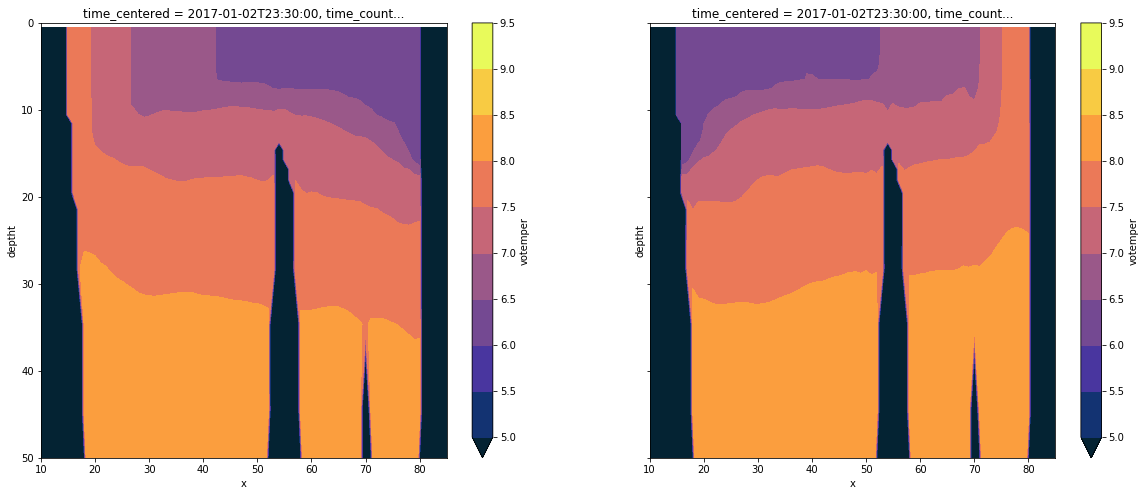

In [93]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
WN005T.votemper.isel(y=350,time_counter=47).plot.contourf(ax=ax1,levels = np.arange(5,10,0.5),cmap = cmocean.cm.thermal)
WS005T.votemper.isel(y=350,time_counter=47).plot.contourf(ax=ax2,levels = np.arange(5,10,0.5),cmap=cmocean.cm.thermal)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((10,85))
ax2.set_xlim((10,85))

(75, 260)

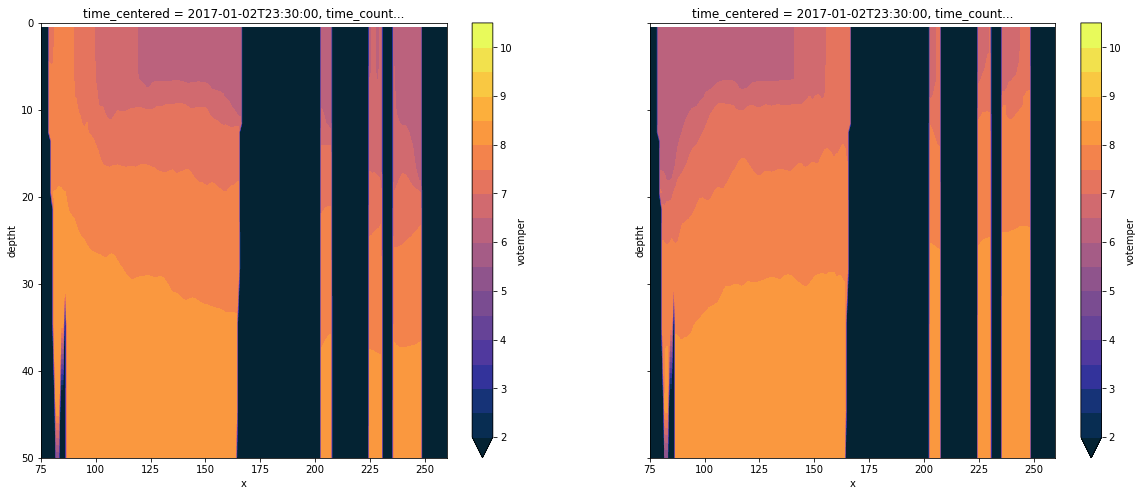

In [91]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
WN005T.votemper.isel(y=180,time_counter=47).plot.contourf(ax=ax1,levels = np.arange(2,11,0.5),cmap = cmocean.cm.thermal)
WS005T.votemper.isel(y=180,time_counter=47).plot.contourf(ax=ax2,levels = np.arange(2,11,0.5),cmap = cmocean.cm.thermal)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((75,260))
ax2.set_xlim((75,260))

In [23]:
WN005V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.1/SalishSea_1h_20160601_20160602_grid_V.nc')
WS005V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.1/SalishSea_1h_20160601_20160602_grid_V.nc')

vgridaa = WN005V2.variables['vomecrty']
zlevelsaa = WN005V2.variables['depthv']
timestepsaa = WN005V2.variables['time_counter']

vgridbb = WS005V2.variables['vomecrty']
zlevelsbb = WS005V2.variables['depthv']
timestepsbb = WS005V2.variables['time_counter']

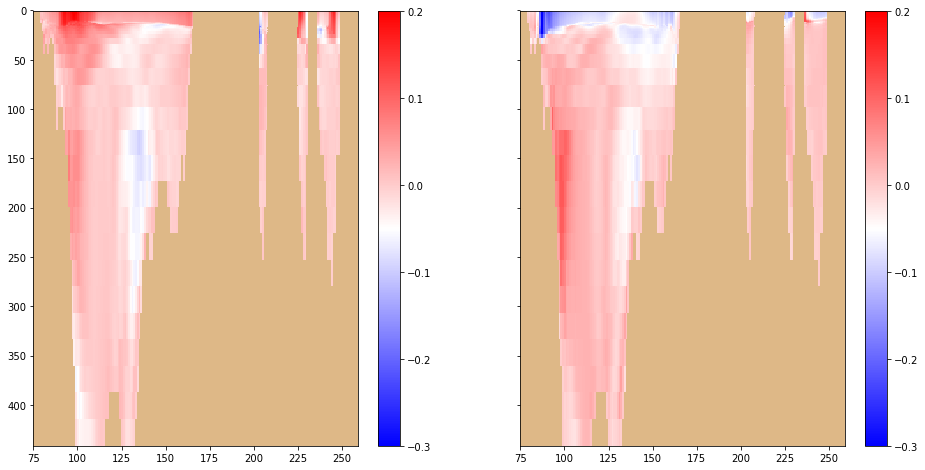

In [24]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 180
section_slice = np.arange(75, 260)
timestamp = nc_tools.timestamp(WN005V2, t)

vgrid_tzyxaa = np.ma.masked_values(vgridaa[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevelsaa[:zmax], vgrid_tzyxaa,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)

vgrid_tzyxbb = np.ma.masked_values(vgridbb[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevelsbb[:zmax], vgrid_tzyxbb,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2)

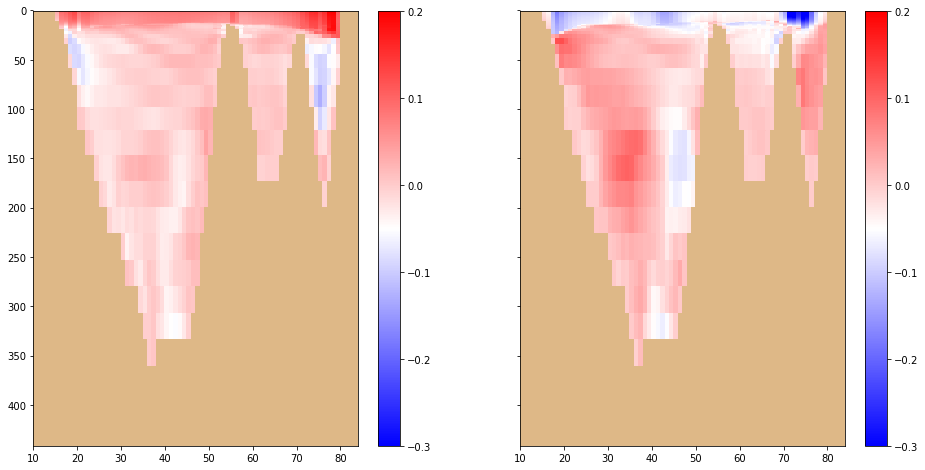

In [25]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 350
section_slice = np.arange(10, 85)
timestamp = nc_tools.timestamp(WN005V2, t)

vgrid_tzyxaa = np.ma.masked_values(vgridaa[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevelsaa[:zmax], vgrid_tzyxaa,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)

vgrid_tzyxbb = np.ma.masked_values(vgridbb[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevelsbb[:zmax], vgrid_tzyxbb,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2)

# June with rr_vtau = 0.05, -0.05

In [98]:
SN005T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunN0.05/SalishSea_1h_20160601_20160602_grid_T.nc')
SN005V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunN0.05/SalishSea_1h_20160601_20160602_grid_V.nc')
SS005T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunS0.05/SalishSea_1h_20160601_20160602_grid_T.nc')
SS005V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JunS0.05/SalishSea_1h_20160601_20160602_grid_V.nc')

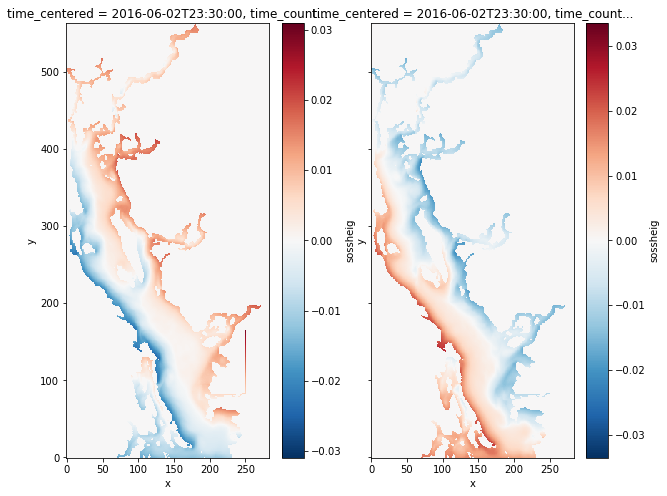

In [99]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
SN005T.sossheig.isel(time_counter = 47).plot(ax=ax1)
SS005T.sossheig.isel(time_counter = 47).plot(ax=ax2)

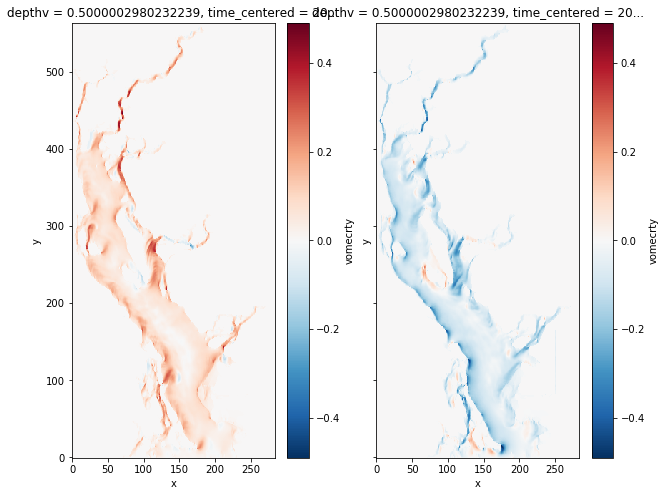

In [100]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
SN005V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax1)
SS005V.vomecrty.isel(depthv = 0,time_counter = 47).plot(ax = ax2)

(10, 85)

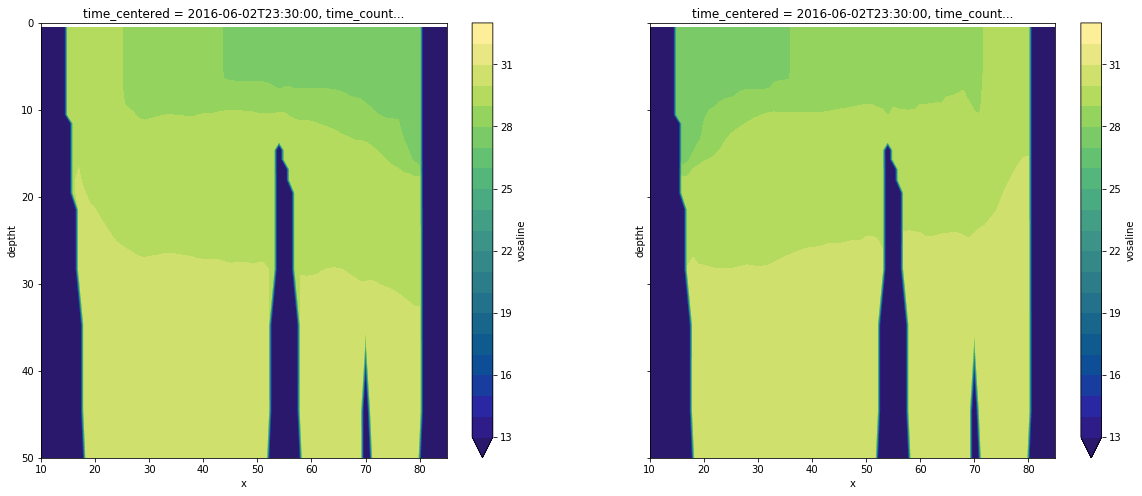

In [101]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
SN005T.vosaline.isel(y=350,time_counter=47).plot.contourf(ax=ax1, levels = np.arange(13,34,1),cmap = cmocean.cm.haline)
SS005T.vosaline.isel(y=350,time_counter=47).plot.contourf(ax=ax2, levels = np.arange(13,34,1),cmap = cmocean.cm.haline)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((10,85))
ax2.set_xlim((10,85))

(75, 260)

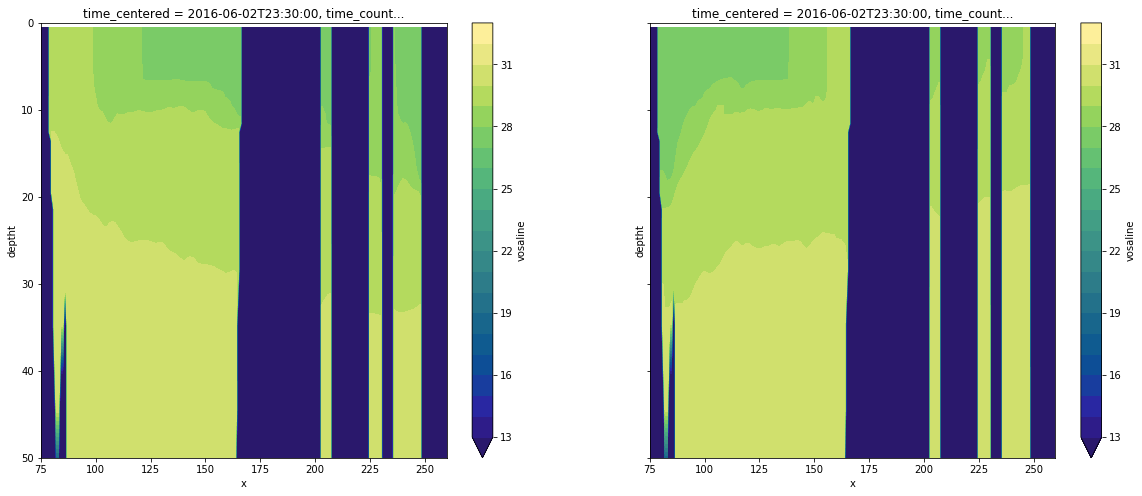

In [102]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
SN005T.vosaline.isel(y=180,time_counter=47).plot.contourf(ax=ax1, levels = np.arange(13,34,1),cmap = cmocean.cm.haline)
SS005T.vosaline.isel(y=180,time_counter=47).plot.contourf(ax=ax2, levels = np.arange(13,34,1),cmap=cmocean.cm.haline)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((75,260))
ax2.set_xlim((75,260))

(10, 85)

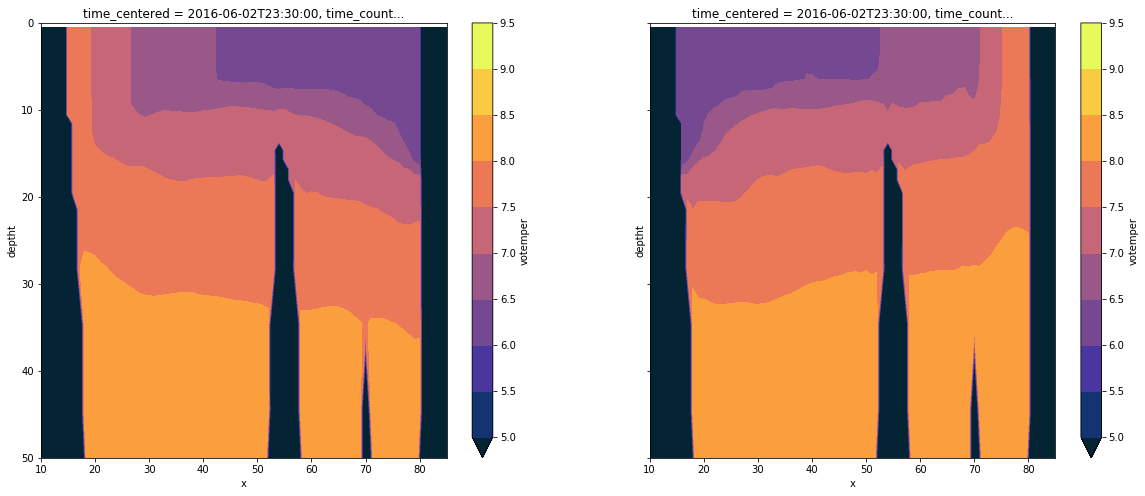

In [103]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
SN005T.votemper.isel(y=350,time_counter=47).plot.contourf(ax=ax1,levels = np.arange(5,10,0.5),cmap = cmocean.cm.thermal)
SS005T.votemper.isel(y=350,time_counter=47).plot.contourf(ax=ax2,levels = np.arange(5,10,0.5),cmap=cmocean.cm.thermal)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((10,85))
ax2.set_xlim((10,85))

(75, 260)

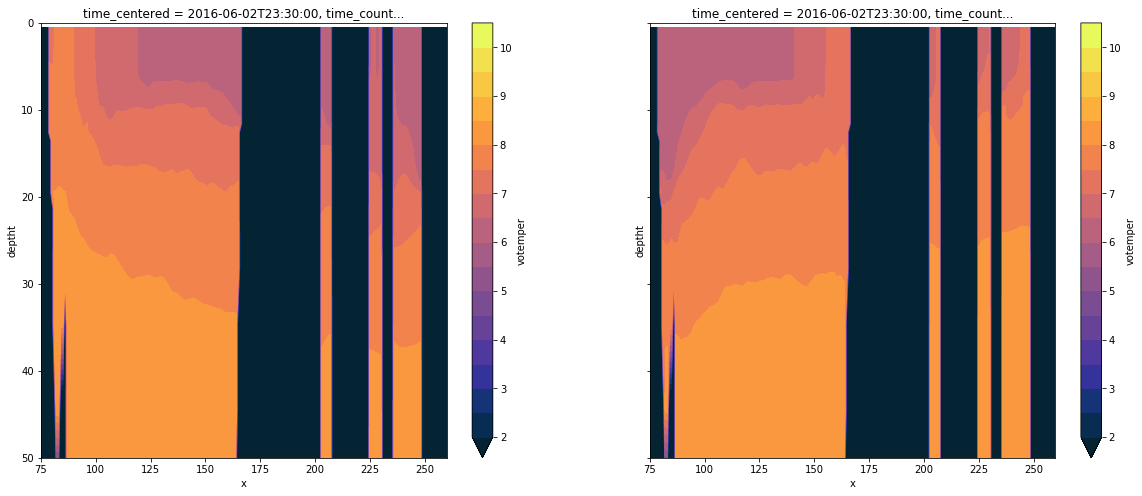

In [104]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
SN005T.votemper.isel(y=180,time_counter=47).plot.contourf(ax=ax1,levels = np.arange(2,11,0.5),cmap = cmocean.cm.thermal)
SS005T.votemper.isel(y=180,time_counter=47).plot.contourf(ax=ax2,levels = np.arange(2,11,0.5),cmap = cmocean.cm.thermal)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((75,260))
ax2.set_xlim((75,260))

In [26]:
SN005V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunN0.1/SalishSea_1h_20160601_20160602_grid_V.nc')
SS005V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JunS0.1/SalishSea_1h_20160601_20160602_grid_V.nc')

vgrid01 = SN005V2.variables['vomecrty']
zlevels01 = SN005V2.variables['depthv']
timesteps01 = SN005V2.variables['time_counter']

vgrid02 = SS005V2.variables['vomecrty']
zlevels02 = SS005V2.variables['depthv']
timesteps02 = SS005V2.variables['time_counter']

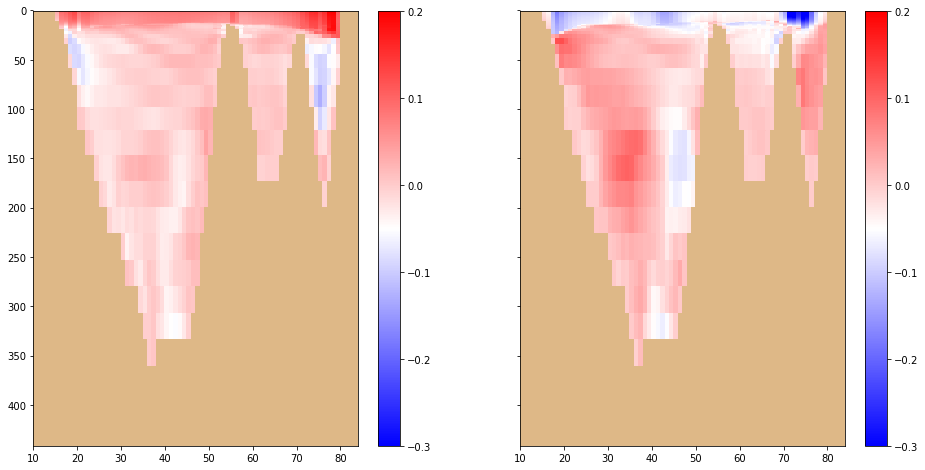

In [45]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 350
section_slice = np.arange(10, 85)
timestamp = nc_tools.timestamp(SN005V2, t)

vgrid_tzyx01 = np.ma.masked_values(vgrid01[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels01[:zmax], vgrid_tzyx01,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)

vgrid_tzyx02 = np.ma.masked_values(vgrid02[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels02[:zmax], vgrid_tzyx02,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2)

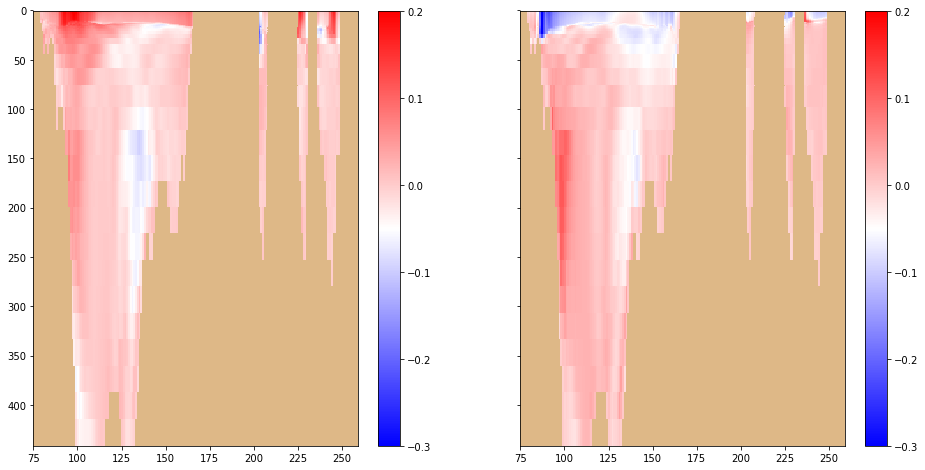

In [28]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 180
section_slice = np.arange(75, 260)
timestamp = nc_tools.timestamp(SN005V2, t)

vgrid_tzyx01 = np.ma.masked_values(vgridaa[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels01[:zmax], vgrid_tzyx01,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)

vgrid_tzyx02 = np.ma.masked_values(vgrid02[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels02[:zmax], vgrid_tzyx02,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2)

# January with rr_vtau = 0.02, -0.02

In [29]:
WN002T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanN0.02/SalishSea_1h_20170101_20170102_grid_T.nc')
WN002V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanN0.02/SalishSea_1h_20170101_20170102_grid_V.nc')
WS002T = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanS0.02/SalishSea_1h_20170101_20170102_grid_T.nc')
WS002V = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/JanS0.02/SalishSea_1h_20170101_20170102_grid_V.nc')

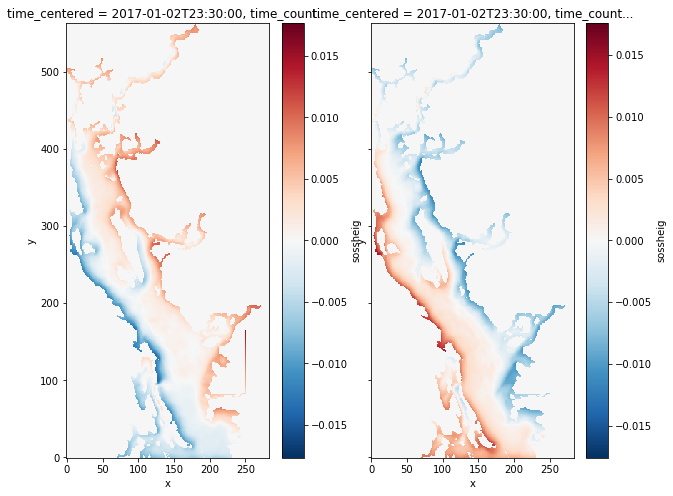

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
WN002T.sossheig.isel(time_counter = 47).plot(ax=ax1)
WS002T.sossheig.isel(time_counter = 47).plot(ax=ax2)

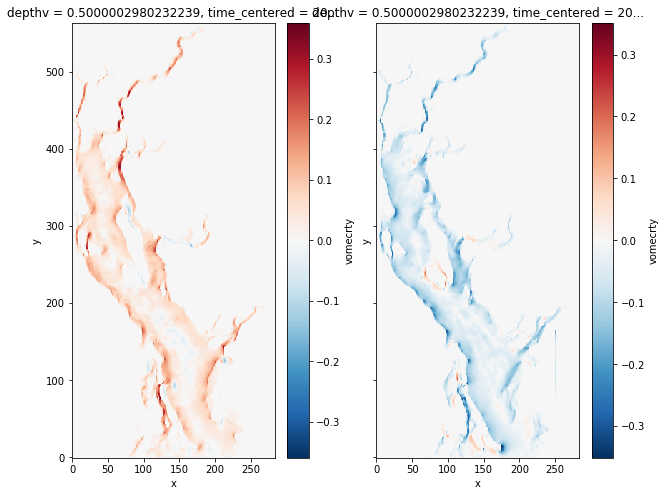

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,8))
WN002V.vomecrty.isel(time_counter = 47,depthv = 0).plot(ax=ax1)
WS002V.vomecrty.isel(time_counter = 47, depthv = 0).plot(ax=ax2)

(10, 85)

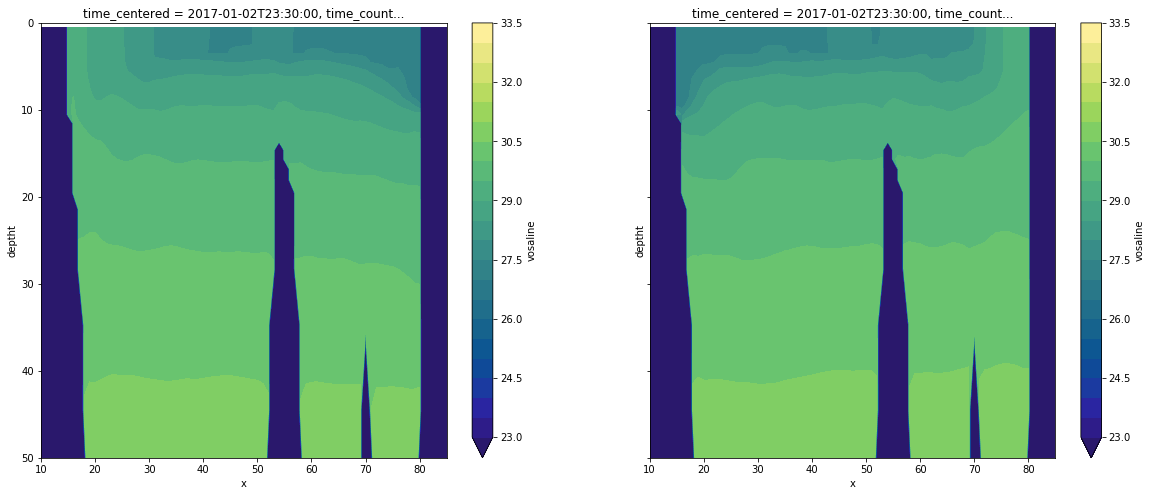

In [37]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
WN002T.vosaline.isel(y=350,time_counter=47).plot.contourf(ax=ax1, levels = np.arange(23,34,0.5),cmap = cmocean.cm.haline)
WS002T.vosaline.isel(y=350,time_counter=47).plot.contourf(ax=ax2, levels = np.arange(23,34,0.5),cmap = cmocean.cm.haline)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((10,85))
ax2.set_xlim((10,85))

(75, 260)

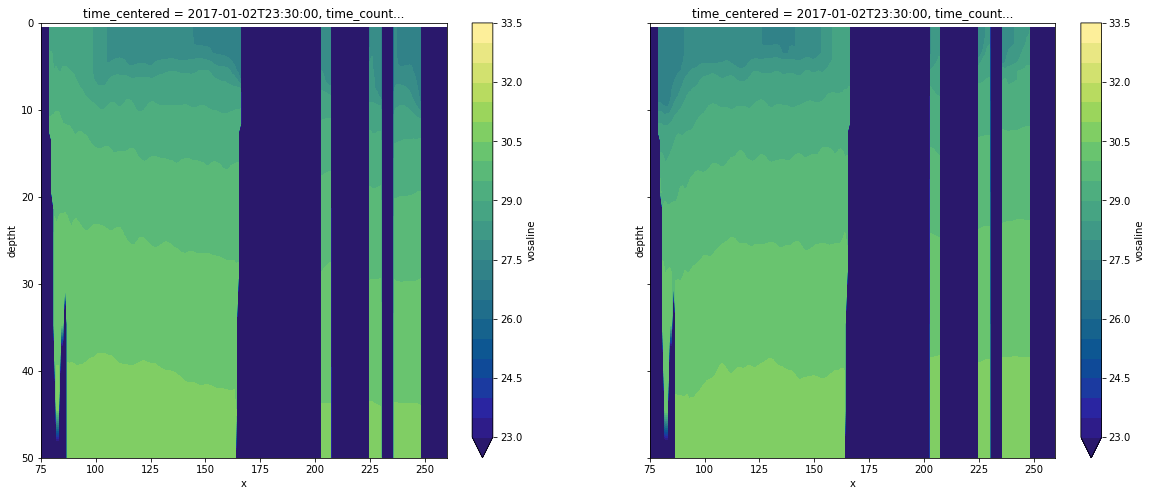

In [38]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
WN002T.vosaline.isel(y=180,time_counter=47).plot.contourf(ax=ax1, levels = np.arange(23,34,0.5),cmap = cmocean.cm.haline)
WS002T.vosaline.isel(y=180,time_counter=47).plot.contourf(ax=ax2, levels = np.arange(23,34,0.5),cmap = cmocean.cm.haline)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((75,260))
ax2.set_xlim((75,260))

(10, 85)

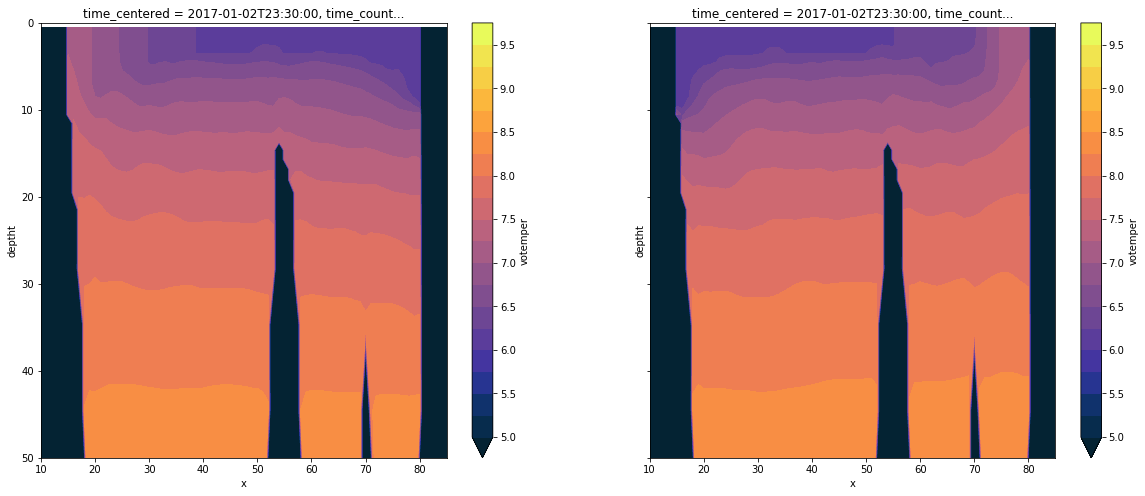

In [41]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
WN002T.votemper.isel(y=350,time_counter=47).plot.contourf(ax=ax1,levels = np.arange(5,10,0.25),cmap = cmocean.cm.thermal)
WS002T.votemper.isel(y=350,time_counter=47).plot.contourf(ax=ax2,levels = np.arange(5,10,0.25),cmap=cmocean.cm.thermal)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((10,85))
ax2.set_xlim((10,85))

(75, 260)

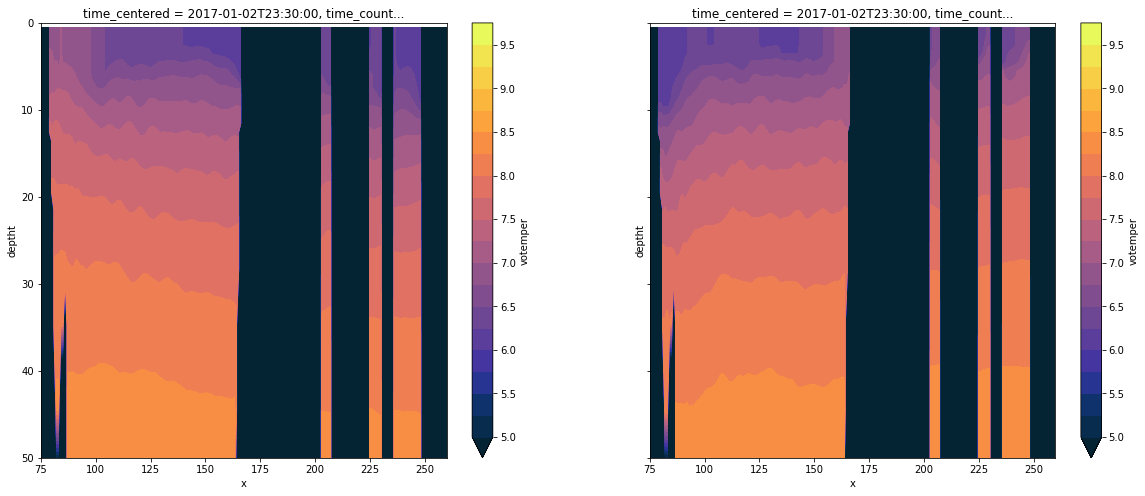

In [44]:
figs,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(20,8))
WN002T.votemper.isel(y=180,time_counter=47).plot.contourf(ax=ax1,levels = np.arange(5,10,0.25),cmap = cmocean.cm.thermal)
WS002T.votemper.isel(y=180,time_counter=47).plot.contourf(ax=ax2,levels = np.arange(5,10,0.25),cmap=cmocean.cm.thermal)
ax1.set_ylim((50,0))
ax2.set_ylim((50,0))
ax1.set_xlim((75,260))
ax2.set_xlim((75,260))

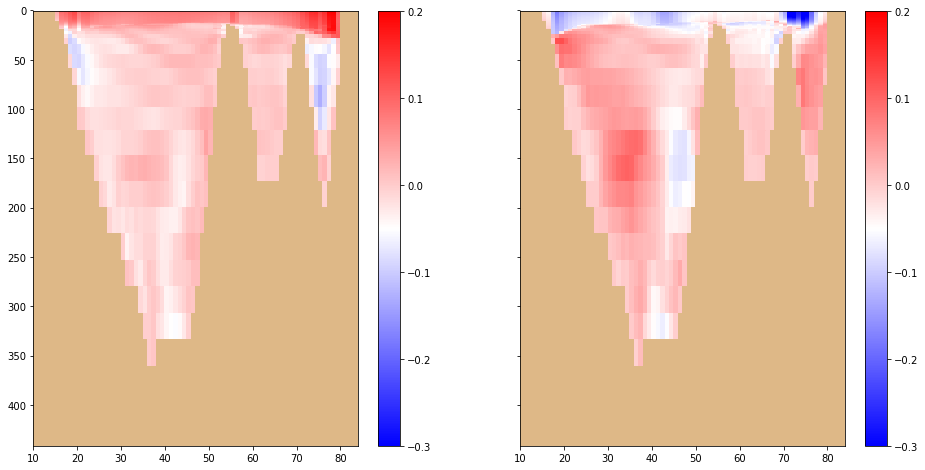

In [47]:
WN002V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanN0.02/SalishSea_1h_20170101_20170102_grid_V.nc')
WS002V2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/JanS0.02/SalishSea_1h_20170101_20170102_grid_V.nc')

vgrid03 = SN005V2.variables['vomecrty']
zlevels03 = SN005V2.variables['depthv']
timesteps03 = SN005V2.variables['time_counter']

vgrid04 = SS005V2.variables['vomecrty']
zlevels04 = SS005V2.variables['depthv']
timesteps04 = SS005V2.variables['time_counter']

fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 350
section_slice = np.arange(10, 85)
timestamp = nc_tools.timestamp(SN005V2, t)

vgrid_tzyx03 = np.ma.masked_values(vgrid03[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels03[:zmax], vgrid_tzyx03,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)

vgrid_tzyx04 = np.ma.masked_values(vgrid04[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels04[:zmax], vgrid_tzyx04,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2)

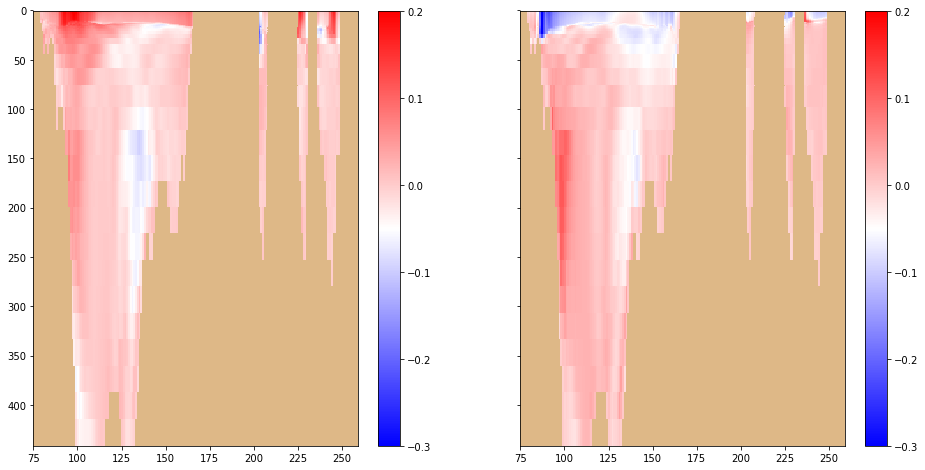

In [49]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (16,8))
land_colour = 'burlywood'

t, zmax, ylocn = 47, 50, 180
section_slice = np.arange(75, 260)
timestamp = nc_tools.timestamp(SN005V2, t)

vgrid_tzyx03 = np.ma.masked_values(vgrid03[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax1.pcolormesh(
    section_slice[:], zlevels03[:zmax], vgrid_tzyx03,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax1.invert_yaxis
cbar = fig.colorbar(mesh, ax=ax1)

vgrid_tzyx04 = np.ma.masked_values(vgrid04[t, :zmax, ylocn, section_slice], 0)

cmap = plt.get_cmap('bwr')
cmap.set_bad(land_colour)
mesh = ax2.pcolormesh(
    section_slice[:], zlevels04[:zmax], vgrid_tzyx04,
    cmap=cmap, vmin=-0.3, vmax=0.2,
)
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2)